In [1]:
#let me import the libraries I may need
import numpy as nb
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

In [2]:
#read the file and display five first rows
df_diamond = pd.read_csv("datasets/diamonds.csv")
df_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#show me the first 20 rows
df_diamond.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
#rename your column Unnamed: 0 to Number, then make NUmber as index
df_diamond.rename(columns={'Unnamed: 0':'Number'},inplace=True)
df_diamond.set_index('Number',inplace=True)
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:

#what is the length of the dataset
len(df_diamond)

53940

In [6]:
#what is the size of the data set (rows,columns)
df_diamond.shape

(53940, 10)

In [7]:
#what are the names of the columns
df_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
#what are the types of each feature
df_diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
#brief statistical summary of the dataset
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
#what is the max carat or #df_diamond.carat.max()
df_diamondmax = df_diamond['carat'].max() 
df_diamondmax

5.0099999999999998

In [11]:
#count each faeture
df_diamond.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [12]:
#one way to call specific column
print("Max price is:", df_diamond['price'].max())
print("Min price is:", df_diamond['price'].min())
print("std price is:", df_diamond['price'].std())
print("Mean price is:", df_diamond['price'].mean())
print("Median price is:", df_diamond['price'].median())

Max price is: 18823
Min price is: 326
std price is: 3989.4397381463023
Mean price is: 3932.799721913237
Median price is: 2401.0


In [13]:
#another way to call specific column
print("Max price is:", df_diamond.price.max())
print("Min price is:", df_diamond.price.min())
print("std price is:", df_diamond.price.std())
print("Mean price is:", df_diamond.price.mean())
print("Median price is:", df_diamond.price.median())

Max price is: 18823
Min price is: 326
std price is: 3989.4397381463023
Mean price is: 3932.799721913237
Median price is: 2401.0


In [14]:
#sort the data by price then display result for selected columns
sorted_diamond=df_diamond.sort_values(by='price',ascending=False)
sorted_diamond=sorted_diamond[['price','carat','clarity','color']]
sorted_diamond.head()

,price,carat,clarity,color
Number,,,,
27750,18823,2.29,VS2,I
27749,18818,2.00,SI1,G
27748,18806,1.51,IF,G
27747,18804,2.07,SI2,G
27746,18803,2.00,SI1,H


In [15]:
#group the dataset by price, price is now the index
df_diamond.groupby('price').mean()

,carat,depth,table,x,y,z
price,,,,,,
326,0.220000,60.650000,58.000000,3.920000,3.910000,2.370000
327,0.230000,56.900000,65.000000,4.050000,4.070000,2.310000
334,0.290000,62.400000,58.000000,4.200000,4.230000,2.630000
335,0.310000,63.300000,58.000000,4.340000,4.350000,2.750000
336,0.240000,62.550000,57.000000,3.945000,3.970000,2.475000
337,0.240000,63.500000,58.000000,3.970000,3.945000,2.510000
338,0.230000,59.400000,61.000000,4.000000,4.050000,2.390000
339,0.300000,64.000000,55.000000,4.250000,4.280000,2.730000
340,0.230000,62.800000,56.000000,3.930000,3.900000,2.460000


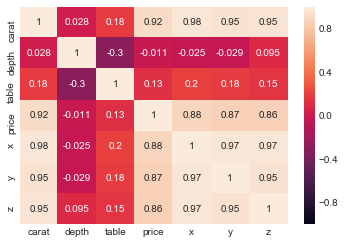

In [16]:
#correlation matrix
dia_corr=df_diamond.corr()
#show it as a heast map
sns.heatmap(dia_corr,vmin=-1,annot=True)

In [17]:
#group by morethan one feature
df_diamond.groupby(['carat','color','price']).mean()

depth      table          x          y         z
carat color price                                                      
0.20  D     367    61.833333  59.000000   3.770000   3.723333  2.316667
      E     345    60.200000  62.000000   3.790000   3.750000  2.270000
            367    60.700000  59.142857   3.801429   3.772857  2.298571
      F     367    62.600000  59.000000   3.730000   3.710000  2.330000
0.21  D     386    59.900000  60.000000   3.880000   3.845000  2.312500
      E     326    59.800000  61.000000   3.890000   3.840000  2.310000
            386    61.100000  56.333333   3.873333   3.833333  2.353333
            394    61.900000  56.000000   3.840000   3.820000  2.370000
0.22  D     404    59.300000  62.000000   3.910000   3.880000  2.310000
      E     337    65.100000  61.000000   3.870000   3.780000  2.490000
            404    61.600000  58.000000   3.930000   3.890000  2.410000
      F     342    60.400000  61.000000   3.880000   3.840000  2.330000
            470    61.700000  60.000000   3.900000   3.850000  2.390000
0.23  D     357    61.150000  59.000000   3.930000   3.950000  2.410000
            362    62.700000  58.000000   3.860000   3.890000  2.430000
            373    59.000000  61.000000   4.040000   4.060000  2.390000
            402    62.375000  57.750000   3.927500   3.967500  2.462500
            411    58.500000  61.000000   4.060000   3.980000  2.350000
            425    60.300000  66.000000   3.910000   3.950000  2.370000
            449    63.500000  57.000000   3.870000   3.850000  2.450000
            452    61.800000  65.000000   3.900000   3.930000  2.420000
            458    61.050000  55.500000   3.955000   3.995000  2.425000
            468    62.400000  56.000000   3.930000   3.980000  2.460000
            472    59.500000  58.500000   4.025000   4.040000  2.400000
            478    64.050000  57.500000   3.865000   3.890000  2.485000
            485    62.600000  58.500000   3.900000   3.930000  2.450000
            492    61.900000  59.500000   3.915000   3.955000  2.435000
            499    59.600000  61.000000   3.990000   4.030000  2.390000
            505    61.900000  60.000000   3.900000   3.950000  2.430000
            530    61.921429  58.142857   3.923571   3.963571  2.442143
...                      ...        ...        ...        ...       ...
3.00  I     10863  57.000000  64.000000   9.380000   9.310000  5.330000
            16970  62.750000  59.000000   9.115000   8.935000  5.660000
      J     14918  59.300000  64.000000   9.320000   9.190000  5.500000
3.01  F     9925   62.200000  56.000000   9.240000   9.130000  5.730000
      G     14220  59.800000  58.000000   9.440000   9.370000  5.620000
      H     10761  56.100000  62.000000   9.540000   9.380000  5.310000
            18593  57.600000  64.000000   9.440000   9.380000  5.420000
      I     8040   62.700000  58.000000   9.100000   8.970000  5.670000
            18242  63.920000  58.200000   9.092000   9.042000  5.792000
      J     16037  61.700000  58.000000   9.250000   9.200000  5.690000
            16538  65.400000  60.000000   8.990000   8.930000  5.860000
            18710  60.200000  58.500000   9.380000   9.270000  5.615000
3.02  I     10577  65.200000  56.000000   9.110000   9.020000  5.910000
3.04  I     15354  63.200000  59.000000   9.140000   9.070000  5.750000
            18559  59.300000  60.000000   9.510000   9.460000  5.620000
3.05  E     10453  60.900000  58.000000   9.260000   9.250000  5.660000
3.11  J     9823   65.900000  57.000000   9.150000   9.020000  5.980000
3.22  I     12545  62.600000  55.000000   9.490000   9.420000  5.920000
3.24  H     12300  62.100000  58.000000   9.440000   9.400000  5.850000
3.40  D     15964  66.800000  52.000000   9.420000   9.340000  6.270000
3.50  H     12587  62.800000  57.000000   9.650000   9.590000  6.030000
3.51  J     18701  62.500000  59.000000   9.660000   9.630000  6.030000
3.65  H     11668  67.100000  53.000000   9.530000   9.480000  

In [18]:
#grouping one fature and tell mean mean values of another feature
df_diamond['carat'].groupby(df_diamond['color']).mean()


color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

In [19]:
df_diamond['carat'].groupby(df_diamond['price']).mean()
#grouping one fature and tell mean mean values of another feature

price
326      0.220000
327      0.230000
334      0.290000
335      0.310000
336      0.240000
337      0.240000
338      0.230000
339      0.300000
340      0.230000
342      0.220000
344      0.310000
345      0.260000
348      0.300000
351      0.300000
352      0.230000
353      0.283333
354      0.230000
355      0.240000
357      0.242500
358      0.260000
360      0.290000
361      0.272500
362      0.242500
363      0.298000
364      0.233333
365      0.320000
366      0.330000
367      0.225294
368      0.300000
369      0.230000
           ...   
18717    2.180000
18718    1.700000
18729    1.510000
18730    1.720000
18731    2.020000
18735    1.940000
18736    2.010000
18741    2.010000
18745    2.360000
18756    2.610000
18757    2.030000
18759    2.000000
18760    2.080000
18766    2.550000
18768    1.710000
18777    1.510000
18779    2.060000
18780    1.600000
18781    2.030000
18784    2.050000
18787    2.050000
18788    2.800000
18791    1.930000
18795    2.020000
1879

In [20]:
#pivot table
pd.pivot_table(df_diamond, index=['color'])

,carat,depth,price,table,x,y,z
color,,,,,,,
D,0.657795,61.698125,3169.954096,57.404590,5.417051,5.421128,3.342827
E,0.657867,61.662090,3076.752475,57.491201,5.411580,5.419029,3.340689
F,0.736538,61.694582,3724.886397,57.433536,5.614961,5.619456,3.464446
G,0.771190,61.757111,3999.135671,57.288629,5.677543,5.680192,3.505021
H,0.911799,61.836850,4486.669196,57.517811,5.983335,5.984815,3.695965
I,1.026927,61.846385,5091.874954,57.577278,6.222826,6.222730,3.845411
J,1.162137,61.887215,5323.818020,57.812393,6.519338,6.518105,4.033251


In [21]:
#pivot table by morethan one values
pd.pivot_table(df_diamond, values=['price','carat'], index=['color'])

,carat,price
color,,
D,0.657795,3169.954096
E,0.657867,3076.752475
F,0.736538,3724.886397
G,0.771190,3999.135671
H,0.911799,4486.669196
I,1.026927,5091.874954
J,1.162137,5323.818020


In [22]:
#pivot table by morethan values and two index
pd.pivot_table(df_diamond, values=['price','carat'], index=['color','clarity'])

carat        price
color clarity                       
D     I1       1.117143  3863.023810
      IF       0.698767  8307.369863
      SI1      0.668401  2976.146423
      SI2      0.872168  3931.101460
      VS1      0.583021  3030.158865
      VS2      0.558321  2587.225692
      VVS1     0.478849  2947.912698
      VVS2     0.528590  3351.128391
E     I1       1.106176  3488.421569
      IF       0.506266  3668.506329
      SI1      0.711303  3161.838005
      SI2      0.921576  4173.826036
      VS1      0.573411  2856.294301
      VS2      0.592231  2750.941700
      VVS1     0.425808  2219.820122
      VVS2     0.475621  2499.674067
F     I1       1.085594  3342.181818
      IF       0.460909  2750.836364
      SI1      0.800849  3714.225716
      SI2      0.986700  4472.625233
      VS1      0.681723  3796.717742
      VS2      0.696311  3756.795093
      VVS1     0.495327  2804.276567
      VVS2     0.589877  3475.512821
G     I1       1.222600  3545.693333
      IF       0.491821  2558.033774
      SI1      0.819610  3774.787449
      SI2      1.067468  5021.684109
      VS1      0.728254  4131.362197
      VS2      0.797946  4416.256498
      VVS1     0.536116  2866.820821
      VVS2     0.655107  3845.283437
H     I1       1.438333  4453.413580
      IF       0.505385  2287.869565
      SI1      0.990945  5032.414945
      SI2      1.241088  6099.895074
      VS1      0.754209  3780.688623
      VS2      0.898704  4722.414486
      VVS1     0.480496  1845.658120
      VVS2     0.582089  2649.067434
I     I1       1.439239  4302.184783
      IF       0.515944  1994.937063
      SI1      1.076875  5355.019663
      SI2      1.395055  7002.649123
      VS1      0.903077  4633.183992
      VS2      1.063020  5690.505560
      VVS1     0.554930  2034.861972
      VVS2     0.678411  2968.232877
J     I1       1.750600  5254.060000
      IF       0.703922  3363.882353
      SI1      1.172827  5186.048000
      SI2      1.424259  6520.958246
      VS1      1.017435  4884.461255
      VS2      1.134651  5311.058824
      VVS1     0.843243  4034.175676
      VVS2     1.028473  5142.396947

In [23]:
#pivot table by morethan values and two index
pd.pivot_table(df_diamond, values=['price','carat','depth'], index=['color','clarity','cut'])

carat      depth         price
color clarity cut                                         
D     I1      Fair       1.877500  65.600000   7383.000000
              Good       1.040000  61.350000   3490.750000
              Ideal      0.960000  61.453846   3526.923077
              Premium    1.155000  61.900000   3818.750000
              Very Good  0.950000  62.200000   2622.800000
      IF      Fair       0.380000  60.766667   1619.666667
              Good       0.786667  60.877778  10030.333333
              Ideal      0.615714  61.496429   6567.178571
              Premium    0.708000  61.070000   9056.500000
              Very Good  0.803043  61.513043  10298.260870
      SI1     Fair       0.913793  64.634483   4273.344828
              Good       0.700802  62.755696   3021.172996
              Ideal      0.594797  61.736179   2490.459350
              Premium    0.691655  61.254317   3236.377698
              Very Good  0.707834  61.822470   3234.931174
      SI2     Fair       1.016964  64.703571   4355.142857
              Good       0.858251  62.063229   3595.295964
              Ideal      0.750309  61.673876   3142.047753
              Premium    0.918907  61.099287   4351.085511
              Very Good  0.931720  61.743631   4425.458599
      VS1     Fair       0.630000  63.160000   2921.200000
              Good       0.663256  61.597674   3556.581395
              Ideal      0.533504  61.620228   2576.039886
              Premium    0.687099  61.132824   4178.045802
              Very Good  0.583371  61.553143   2955.480000
      VS2     Fair       0.843600  62.684000   4512.880000
              Good       0.702500  62.758654   3588.461538
              Ideal      0.499293  61.688478   2111.927174
              Premium    0.584572  61.146313   2919.356932
              Very Good  0.633657  61.968285   3145.194175
...                           ...        ...           ...
J     SI1     Fair       1.181071  63.010714   4553.928571
              Good       1.125795  62.496591   4627.625000
              Ideal      1.143909  61.849794   5115.674897
              Premium    1.257799  61.306699   5726.578947
              Very Good  1.135330  61.873626   5026.543956
      SI2     Fair       1.316667  64.511111   5131.814815
              Good       1.318868  62.388679   5306.113208
              Ideal      1.384455  61.883636   6555.172727
              Premium    1.554534  61.280745   7550.285714
              Very Good  1.360938  61.835938   5992.898438
      VS1     Fair       1.229375  63.675000   5906.187500
              Good       0.875000  62.528846   3662.826923
              Ideal      0.978358  61.835323   4734.427861
              Premium    1.136209  61.565359   5817.261438
              Very Good  0.964917  62.024167   4339.591667
      VS2     Fair       1.032609  63.973913   4067.826087
              Good       1.114333  62.346667   4803.166667
              Ideal      1.051250  61.734914   4867.133621
              Premium    1.245743  61.381683   6175.559406
              Very Good  1.140543  61.868478   5325.548913
      VVS1    Fair       0.700000  67.600000   1691.000000
              Good       1.000000  63.500000   4633.000000
              Ideal      0.578276  61.844828   2000.172414
              Premium    1.224583  61.754167   7244.375000
              Very Good  0.765263  61.684211   3175.526316
      VVS2    Fair       1.010000  66.000000   2998.000000
              Good       0.936923  61.661538   4371.153846
              Ideal      0.870556  61.759259   4121.925926
              Premium    1.252059  61.435294   6423.352941
              Very Good  1.102069  62.410345   5960.448276

[276 rows x 3 columns]

In [24]:
#correlation of #pivot table by morethan values and two index
df_diamond_corr=pd.pivot_table(df_diamond, values=['price','carat','depth'], index=['color','clarity','cut'])
df_diamond_corr.corr()

,carat,depth,price
carat,1.000000,0.325107,0.687097
depth,0.325107,1.000000,0.046781
price,0.687097,0.046781,1.000000


In [25]:
pd.pivot_table(df_diamond, values=['price','carat'], index=['color','clarity']).mean()

carat       0.830841
price    3904.223580
dtype: float64

In [26]:
#any null value?
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
#find max and identify associated values
maxprice = df_diamond['price'].max()
df_diamond.loc[maxprice]

carat              1
cut        Very Good
color              F
clarity          VS1
depth           59.8
table             58
price           7710
x               6.49
y               6.53
z               3.89
Name: 18823, dtype: object

In [28]:
#find min and identify associated values
minprice = df_diamond['price'].min()
df_diamond.loc[minprice]

carat           0.87
cut        Very Good
color              G
clarity          SI2
depth           59.9
table             58
price           2802
x               6.19
y               6.23
z               3.72
Name: 326, dtype: object

In [29]:
#duplicated values?
dupe = df_diamond['price'].duplicated()
df_diamond.loc[dupe]

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
19,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71
20,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66
21,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
24,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62
25,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59


In [30]:
#carat grater than 5
df_diamond_max =df_diamond.loc[df_diamond['carat'] > 5.0]
df_diamond_max

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [31]:
#multiple conditions
df_diamond.loc[(df_diamond['color'] == 'D') & (df_diamond['cut'] == 'Ideal') & (df_diamond['price'] >= 18000)]

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27548,1.61,Ideal,D,VS2,62.0,55.0,18318,7.51,7.50,4.67
27563,2.06,Ideal,D,SI2,60.3,56.0,18371,8.29,8.25,4.99
27668,2.01,Ideal,D,SI2,62.1,56.0,18674,8.02,8.11,5.01
27677,2.19,Ideal,D,SI2,61.8,57.0,18693,8.23,8.49,5.17


In [32]:
#multiple conditions
df_diamond.loc[(df_diamond['color'] == 'D') & (df_diamond['cut'] == 'Ideal') & (df_diamond['clarity'] == 'IF') & (df_diamond['carat'] >= 4)]

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,


In [33]:
#sort values 
df_diamond.sort_values('price', ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27745,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27743,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27741,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70


In [34]:
pd.pivot_table(df_diamond, values=['price','carat','depth'], index=['color','clarity','cut'])

carat      depth         price
color clarity cut                                         
D     I1      Fair       1.877500  65.600000   7383.000000
              Good       1.040000  61.350000   3490.750000
              Ideal      0.960000  61.453846   3526.923077
              Premium    1.155000  61.900000   3818.750000
              Very Good  0.950000  62.200000   2622.800000
      IF      Fair       0.380000  60.766667   1619.666667
              Good       0.786667  60.877778  10030.333333
              Ideal      0.615714  61.496429   6567.178571
              Premium    0.708000  61.070000   9056.500000
              Very Good  0.803043  61.513043  10298.260870
      SI1     Fair       0.913793  64.634483   4273.344828
              Good       0.700802  62.755696   3021.172996
              Ideal      0.594797  61.736179   2490.459350
              Premium    0.691655  61.254317   3236.377698
              Very Good  0.707834  61.822470   3234.931174
      SI2     Fair       1.016964  64.703571   4355.142857
              Good       0.858251  62.063229   3595.295964
              Ideal      0.750309  61.673876   3142.047753
              Premium    0.918907  61.099287   4351.085511
              Very Good  0.931720  61.743631   4425.458599
      VS1     Fair       0.630000  63.160000   2921.200000
              Good       0.663256  61.597674   3556.581395
              Ideal      0.533504  61.620228   2576.039886
              Premium    0.687099  61.132824   4178.045802
              Very Good  0.583371  61.553143   2955.480000
      VS2     Fair       0.843600  62.684000   4512.880000
              Good       0.702500  62.758654   3588.461538
              Ideal      0.499293  61.688478   2111.927174
              Premium    0.584572  61.146313   2919.356932
              Very Good  0.633657  61.968285   3145.194175
...                           ...        ...           ...
J     SI1     Fair       1.181071  63.010714   4553.928571
              Good       1.125795  62.496591   4627.625000
              Ideal      1.143909  61.849794   5115.674897
              Premium    1.257799  61.306699   5726.578947
              Very Good  1.135330  61.873626   5026.543956
      SI2     Fair       1.316667  64.511111   5131.814815
              Good       1.318868  62.388679   5306.113208
              Ideal      1.384455  61.883636   6555.172727
              Premium    1.554534  61.280745   7550.285714
              Very Good  1.360938  61.835938   5992.898438
      VS1     Fair       1.229375  63.675000   5906.187500
              Good       0.875000  62.528846   3662.826923
              Ideal      0.978358  61.835323   4734.427861
              Premium    1.136209  61.565359   5817.261438
              Very Good  0.964917  62.024167   4339.591667
      VS2     Fair       1.032609  63.973913   4067.826087
              Good       1.114333  62.346667   4803.166667
              Ideal      1.051250  61.734914   4867.133621
              Premium    1.245743  61.381683   6175.559406
              Very Good  1.140543  61.868478   5325.548913
      VVS1    Fair       0.700000  67.600000   1691.000000
              Good       1.000000  63.500000   4633.000000
              Ideal      0.578276  61.844828   2000.172414
              Premium    1.224583  61.754167   7244.375000
              Very Good  0.765263  61.684211   3175.526316
      VVS2    Fair       1.010000  66.000000   2998.000000
              Good       0.936923  61.661538   4371.153846
              Ideal      0.870556  61.759259   4121.925926
              Premium    1.252059  61.435294   6423.352941
              Very Good  1.102069  62.410345   5960.448276

[276 rows x 3 columns]

In [35]:
#new table
df_depth = df_diamond[['depth','price']]
df_depth.tail()

,depth,price
Number,,
53936,60.8,2757
53937,63.1,2757
53938,62.8,2757
53939,61.0,2757
53940,62.2,2757


In [36]:
#new table
df_depth = df_diamond[['color','price','clarity','carat']].sort_values('color', ascending=False)
df_depth.tail()

,color,price,clarity,carat
Number,,,,
18145,D,7351,SI1,1.24
33659,D,835,VVS2,0.35
33658,D,835,VS1,0.30
33657,D,835,VS1,0.30
53940,D,2757,SI2,0.75


In [37]:
#new table
df_depth = df_diamond[['color','price','clarity','carat']].sort_values('price', ascending=False)
df_depth.tail()

,color,price,clarity,carat
Number,,,,
5,J,335,SI2,0.31
4,I,334,VS2,0.29
3,E,327,VS1,0.23
2,E,326,SI1,0.21
1,E,326,SI2,0.23


In [38]:
#new depth data tail
df_depth = df_diamond[['color','price','clarity','carat']].sort_values('clarity', ascending=False)

df_depth.tail()

,color,price,clarity,carat
Number,,,,
6980,E,4153,I1,1.18
4285,E,3584,I1,1.00
845,D,2869,I1,1.08
4284,E,3584,I1,1.00
18232,I,7403,I1,2.04


In [39]:
#depth data
df_depth = df_diamond[['color','price','clarity','carat']].sort_values('carat', ascending=False)
df_depth.tail()

,color,price,clarity,carat
Number,,,,
31593,E,367,VS2,0.2
31592,E,367,VS2,0.2
31602,D,367,VS2,0.2
15,E,345,SI2,0.2
31597,F,367,VS2,0.2


In [40]:
#create duplicate depth data
depth = df_diamond['depth']
price = df_diamond['price']
carat = df_diamond['carat']
depth2 = list(zip(depth,price,carat))
df_depth2 = pd.DataFrame(data = depth2, columns=['Depth', 'Price','Carat'])
df_depth2

,Depth,Price,Carat
0,61.5,326,0.23
1,59.8,326,0.21
2,56.9,327,0.23
3,62.4,334,0.29
4,63.3,335,0.31
5,62.8,336,0.24
6,62.3,336,0.24
7,61.9,337,0.26
8,65.1,337,0.22
9,59.4,338,0.23


In [41]:
df_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [42]:
result = smf.ols('price ~ carat + cut + clarity + x + y + z + color + depth + table', data=df_diamond).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:56:25   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2184.4774    408.197      5.352      0.000    1384.409    2984.546
cut[T.Good]        579.7514     33.592     17.259      0.000     513.911     645.592
cut[T.Ideal]       832.9118     33.407     24.932      0.000     767.433     898.391
cut[T.Premium]     762.1440     32.228     23.649      0.000     698.978     825.310
cut[T.Very Good]   726.7826     32.241     22.542      0.000     663.591     789.975
clarity[T.IF]     5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity[T.SI1]    3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity[T.SI2]    2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity[T.VS1]    4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity[T.VS2]    4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity[T.VVS1]   5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity[T.VVS2]   4950.8141     45.855    107.967      0.000    4860.938    5040.690
color[T.E]        -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color[T.F]        -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color[T.G]        -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color[T.H]        -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color[T.I]       -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color[T.J]       -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
carat             1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
x                -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                    9.6089     19.333      0.497      0.619     -28.284      47.502
z                  -50.1189     33.486     -1.497      0.134    -115.752      15.515
depth              -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table              -26.4741      2.912     -9.092      0.000     -32.181     -20.767
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#remove z, y from regression, not correlated
result = smf.ols('price ~ carat + cut + clarity + x +  color + depth + table', data=df_diamond).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:56:26   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2366.0858    390.351      6.061      0.000    1600.995    3131.177
cut[T.Good]        580.2405     33.572     17.283      0.000     514.438     646.043
cut[T.Ideal]       833.2603     33.396     24.951      0.000     767.804     898.716
cut[T.Premium]     762.7586     32.225     23.670      0.000     699.598     825.919
cut[T.Very Good]   726.8201     32.212     22.564      0.000     663.685     789.955
clarity[T.IF]     5344.3381     51.015    104.761      0.000    5244.349    5444.327
clarity[T.SI1]    3664.9053     43.627     84.005      0.000    3579.396    3750.415
clarity[T.SI2]    2702.0771     43.812     61.674      0.000    2616.205    2787.949
clarity[T.VS1]    4577.5892     44.535    102.786      0.000    4490.300    4664.879
clarity[T.VS2]    4266.6117     43.847     97.308      0.000    4180.672    4352.551
clarity[T.VVS1]   5007.0611     47.152    106.190      0.000    4914.643    5099.479
clarity[T.VVS2]   4950.1680     45.847    107.972      0.000    4860.308    5040.028
color[T.E]        -209.2370     17.893    -11.694      0.000    -244.307    -174.167
color[T.F]        -272.8341     18.093    -15.080      0.000    -308.296    -237.372
color[T.G]        -481.9429     17.716    -27.204      0.000    -516.667    -447.219
color[T.H]        -980.1218     18.836    -52.035      0.000   -1017.040    -943.204
color[T.I]       -1466.1815     21.162    -69.283      0.000   -1507.660   -1424.703
color[T.J]       -2369.5038     26.131    -90.678      0.000   -2420.720   -2318.287
carat             1.126e+04     48.600    231.626      0.000    1.12e+04    1.14e+04
x                -1029.4779     20.549    -50.098      0.000   -1069.755    -989.201
depth              -66.7693      4.091    -16.322      0.000     -74.787     -58.752
table              -26.4573      2.911     -9.089      0.000     -32.163     -20.752
==============================================================================
Omnibus:                    14433.691   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566407.977
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.833   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#set to coefficients to zero
result = smf.ols('price ~ carat + cut + clarity + x +  color + depth + table -1', data=df_diamond).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:56:27   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cut[Fair]        2366.0858    390.351      6.061      0.000    1600.995    3131.177
cut[Good]        2946.3263    383.841      7.676      0.000    2193.994    3698.658
cut[Ideal]       3199.3461    375.992      8.509      0.000    2462.399    3936.293
cut[Premium]     3128.8443    380.057      8.233      0.000    2383.930    3873.759
cut[Very Good]   3092.9059    380.335      8.132      0.000    2347.446    3838.366
clarity[T.IF]    5344.3381     51.015    104.761      0.000    5244.349    5444.327
clarity[T.SI1]   3664.9053     43.627     84.005      0.000    3579.396    3750.415
clarity[T.SI2]   2702.0771     43.812     61.674      0.000    2616.205    2787.949
clarity[T.VS1]   4577.5892     44.535    102.786      0.000    4490.300    4664.879
clarity[T.VS2]   4266.6117     43.847     97.308      0.000    4180.672    4352.551
clarity[T.VVS1]  5007.0611     47.152    106.190      0.000    4914.643    5099.479
clarity[T.VVS2]  4950.1680     45.847    107.972      0.000    4860.308    5040.028
color[T.E]       -209.2370     17.893    -11.694      0.000    -244.307    -174.167
color[T.F]       -272.8341     18.093    -15.080      0.000    -308.296    -237.372
color[T.G]       -481.9429     17.716    -27.204      0.000    -516.667    -447.219
color[T.H]       -980.1218     18.836    -52.035      0.000   -1017.040    -943.204
color[T.I]      -1466.1815     21.162    -69.283      0.000   -1507.660   -1424.703
color[T.J]      -2369.5038     26.131    -90.678      0.000   -2420.720   -2318.287
carat            1.126e+04     48.600    231.626      0.000    1.12e+04    1.14e+04
x               -1029.4779     20.549    -50.098      0.000   -1069.755    -989.201
depth             -66.7693      4.091    -16.322      0.000     -74.787     -58.752
table             -26.4573      2.911     -9.089      0.000     -32.163     -20.752
==============================================================================
Omnibus:                    14433.691   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566407.977
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.833   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

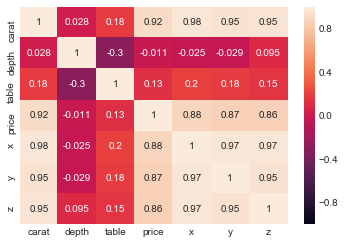

In [45]:
#correlation matrix
dia_corr=df_diamond.corr()
#show it as a heast map
sns.heatmap(df_diamond.corr(),vmin=-1,annot=True)

So price is correlated with carat and x, y, z.   
carat is correlated with x, y, z and 

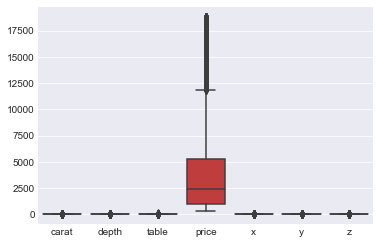

In [46]:
#boxplot showing stats for each feature
sns.boxplot(data=df_diamond)

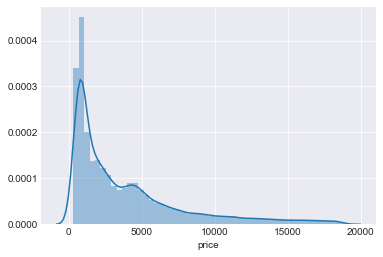

In [47]:
#create a histogram of the distribution of power
sns.distplot(df_diamond['price'])

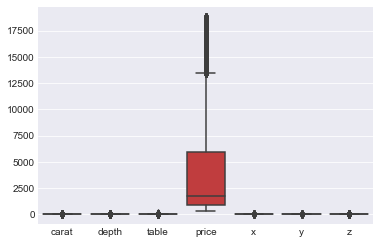

In [48]:
df_diamond2=df_diamond.drop(df_diamond['price'])
#create a histogram of the distribution of power
sns.boxplot(data=df_diamond2)

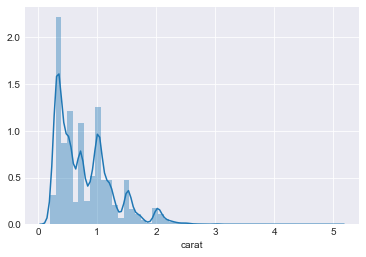

In [49]:
#create a histogram of the distribution of power
sns.distplot(df_diamond['carat'])

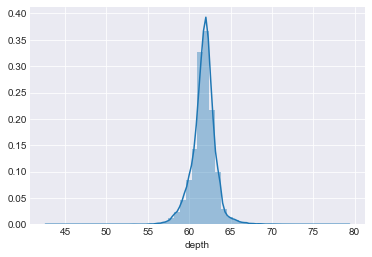

In [50]:
#create a histogram of the distribution of power
sns.distplot(df_diamond['depth'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

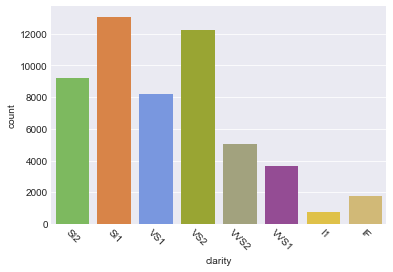

In [51]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
#create a bar plot of clarity frequency
sns.countplot(x='clarity',
              data=df_diamond,
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

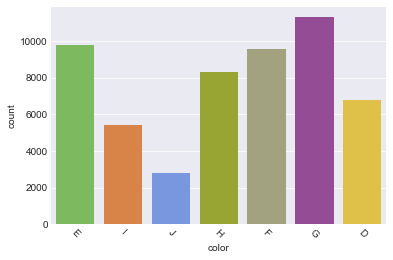

In [52]:
#create a bar plot of clarity frequency
sns.countplot(x='color',
              data=df_diamond,
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

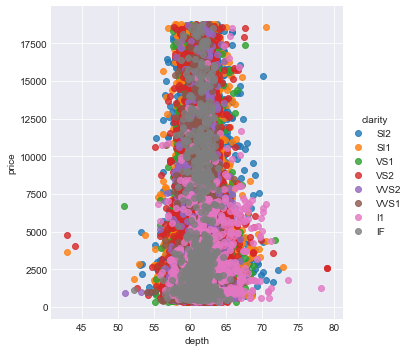

In [53]:
#add more details to scatterplot
sns.lmplot(x='depth', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='clarity')   #color by evolution stage

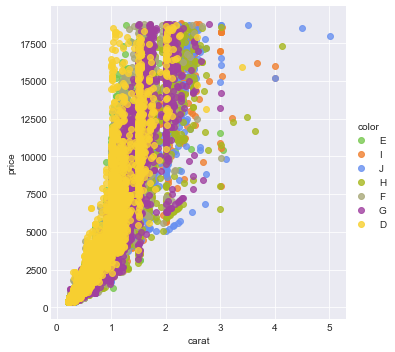

In [54]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='color',palette=pkmn_type_colors)   #color by evolution stage

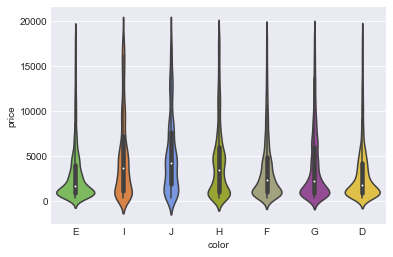

In [55]:
#add more details to scatterplot
sns.violinplot(x='color', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

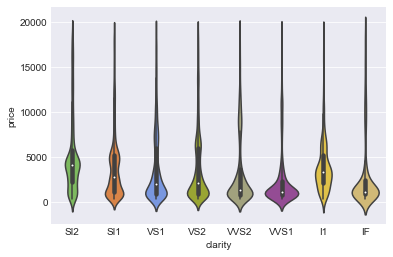

In [56]:
#add more details to scatterplot
sns.violinplot(x='clarity', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

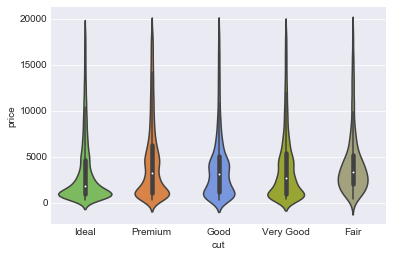

In [57]:
#add more details to scatterplot
sns.violinplot(x='cut', y='price', data=df_diamond, 
           palette=pkmn_type_colors)   #color by evolution stage

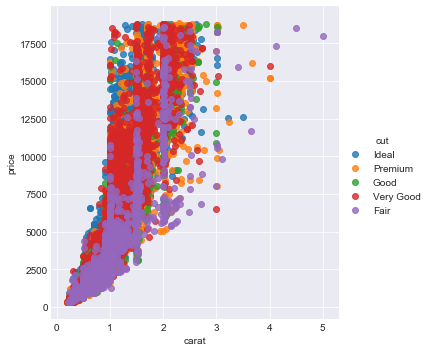

In [58]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='cut')   #color by evolution stage

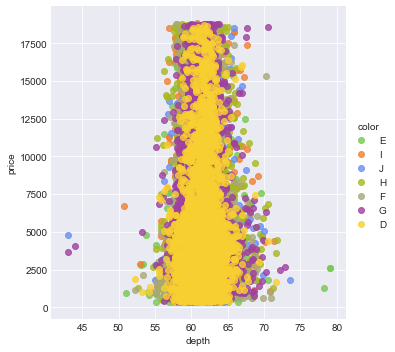

In [59]:

#add more details to scatterplot
sns.lmplot(x='depth', y='price', data=df_diamond, 
           fit_reg=False, #remove regression line
           hue='color',palette=pkmn_type_colors)   #color by evolution stage

In [60]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df = df_diamond.drop(['depth', 'table'], axis=1)
#stats_df.head()
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(stats_df, 
                  id_vars=['carat', 'cut', 'clarity','color'], #column to keep
                  var_name="Stat")

melt_df.head()

,carat,cut,clarity,color,Stat,value
0,0.23,Ideal,SI2,E,price,326.0
1,0.21,Premium,SI1,E,price,326.0
2,0.23,Good,VS1,E,price,327.0
3,0.29,Premium,VS2,I,price,334.0
4,0.31,Good,SI2,J,price,335.0


In [65]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df_diamond = df_diamond.drop(['price'], axis=1)
stats_df_diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z
Number,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


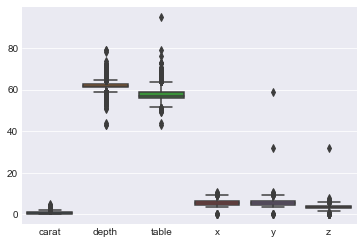

In [66]:
#boxplot showing stats for each characteristic
sns.boxplot(data=stats_df_diamond)

In [64]:
df_diamond_pivot =pd.pivot_table(df_diamond, values=['price','carat','depth'], index=['color','clarity','cut'])
df_diamond_pivot.head(20)

carat      depth         price
color clarity cut                                         
D     I1      Fair       1.877500  65.600000   7383.000000
              Good       1.040000  61.350000   3490.750000
              Ideal      0.960000  61.453846   3526.923077
              Premium    1.155000  61.900000   3818.750000
              Very Good  0.950000  62.200000   2622.800000
      IF      Fair       0.380000  60.766667   1619.666667
              Good       0.786667  60.877778  10030.333333
              Ideal      0.615714  61.496429   6567.178571
              Premium    0.708000  61.070000   9056.500000
              Very Good  0.803043  61.513043  10298.260870
      SI1     Fair       0.913793  64.634483   4273.344828
              Good       0.700802  62.755696   3021.172996
              Ideal      0.594797  61.736179   2490.459350
              Premium    0.691655  61.254317   3236.377698
              Very Good  0.707834  61.822470   3234.931174
      SI2     Fair       1.016964  64.703571   4355.142857
              Good       0.858251  62.063229   3595.295964
              Ideal      0.750309  61.673876   3142.047753
              Premium    0.918907  61.099287   4351.085511
              Very Good  0.931720  61.743631   4425.458599

In [69]:
#make numeric value column based on string value column

#create a function that will return 1 if female and 0 if male
def score_to_numeric(x):
    if x=='Fair':
        return 0
    if x=='Good':
        return 1
    if x=='Ideal':
        return 2
    if x=='Premium':
        return 3
    if x=='Very Good':
        return 4
    
df_diamond['cut_val'] = df_diamond['cut'].apply(score_to_numeric)
df_diamond.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val
Number,,,,,,,,,,,
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,2


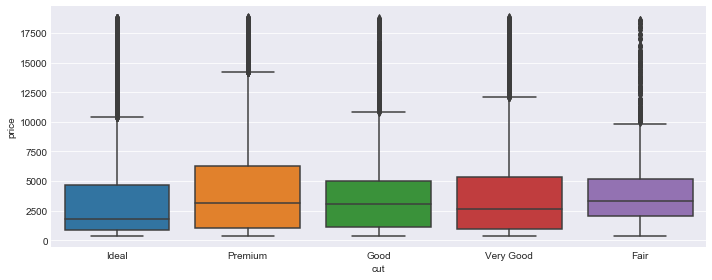

In [70]:
sns.factorplot(x='cut', y='price', data=df_diamond, kind='box' ,aspect=2.5 )

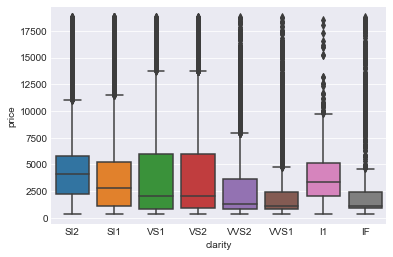

In [72]:
sns.boxplot(x='clarity', y='price', data=df_diamond )

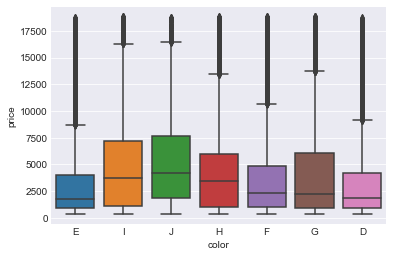

In [73]:
sns.boxplot(x='color', y='price', data=df_diamond )